In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/

[Errno 2] No such file or directory: '/content/gdrive/My Drive/'
/content


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mush = pd.read_csv('mushrooms.csv')

In [ ]:
# 변수 추가 및 삭제
def var_del(mush):
    del_col = ["stalk-root", "veil-type"]
    mush.drop(del_col, axis=1, inplace=True)
    
    return mush

In [ ]:
# 변수 선택
def var_select(mush):
    # 'habitat', 'stalk-surface-below-ring', 'stalk-shape', 'population', 'gill-color', 'gill-spacing', 'stalk-surface-above-ring',
    cols = ['class', 'spore-print-color','ring-type', 'bruises', 'odor', 'gill-size']
    mush = mush[cols]

    return mush

In [ ]:
def transform_features(mush):
    mush = var_del(mush)
    mush = var_select(mush)
    return mush

In [ ]:
mush = transform_features(mush)

In [ ]:
X = mush.iloc[:,1:]
y = mush['class']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

onehot = OneHotEncoder()
onehot.fit(X)
X = onehot.transform(X).toarray()

labenc = LabelEncoder()
y = labenc.fit_transform(y)
 # 0-edible, 1-poisnous

In [ ]:
# 랜덤 샘플링
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
X_train.shape

(6499, 27)

# 평가 기준

In [ ]:
from sklearn.model_selection import cross_validate

# Train CV 결과
def CV_check(model, X, Y):
    CV_df = pd.DataFrame(cross_validate(model, X, Y, scoring=scoring, cv=5))
    CV_df = CV_df.iloc[:,2:]
    CV_df.columns = scoring

    print('[Train] \n')
    print("5-fold CV Clasification report:\n")
    print(CV_df,"\n\n")
    print("Mean Scores:\n")
    for score in scoring:
        print(f"\t{score}: {round(CV_df[score].mean(),4)}")

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

# Train Data CV 결과 이용한 ROC
def plt_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=14)
    plt.ylabel('True Positive Rate (Recall)', fontsize=14)

def ROC_check(model, X, Y):
    # y_scores = model.predict_proba(X)
    y_scores = cross_val_predict(model, X, Y, cv=5, method='predict_proba')
    fpr, tpr, thresholds = roc_curve(Y, y_scores[:,1])
    auc = roc_auc_score(y_train, y_scores[:,1])

    plt.figure(figsize = (6,6))
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([-.1,1.1,-.1,1.1])
    plt_roc_curve(fpr,tpr, 'LOGISTIC')
    plt.legend(loc='lower right')
    plt.title('ROC curve', fontsize=16)
    plt.grid(True)
    plt.show()

    print('\nAUC: ', auc)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Test에 사용 (CV 안함)
def error_result_check(model, X, Y):
    pred = model.predict(X)

    confu = confusion_matrix(y_true=Y, y_pred=pred)
    print('\n\n[Test] \n')
    print("Confusion Matrix: \n")
    print(confu, '\n')

    acc = accuracy_score(y_true=Y, y_pred=pred)    
    print('Test Accuracy: ', round(acc,4))

In [ ]:
scoring = ['accuracy','precision', 'recall','f1']

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logis = LogisticRegression()
logis.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[Train] 

5-fold CV Clasification report:

   accuracy  precision    recall        f1
0  0.992308        1.0  0.984152  0.992013
1  0.992308        1.0  0.984127  0.992000
2  0.993846        1.0  0.987302  0.993610
3  0.994615        1.0  0.988889  0.994413
4  0.993841        1.0  0.987302  0.993610 


Mean Scores:

	accuracy: 0.9934
	precision: 1.0
	recall: 0.9864
	f1: 0.9931


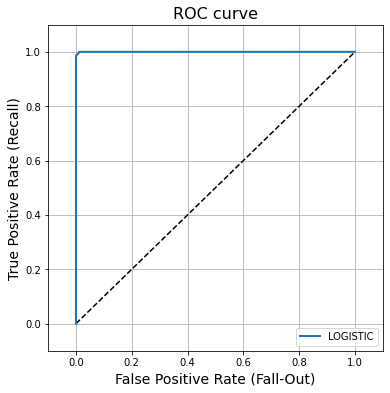


AUC:  0.9999065836754333


[Test] 

Confusion Matrix: 

[[3348    0]
 [  43 3108]] 

Test Accuracy:  0.9934


In [ ]:
CV_check(logis, X_train, y_train)
ROC_check(logis, X_train, y_train)
error_result_check(logis, X_train, y_train)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Train] 

5-fold CV Clasification report:

   accuracy  precision    recall        f1
0  0.993077   0.985938  1.000000  0.992919
1  0.993077   1.000000  0.985714  0.992806
2  0.994615   0.989011  1.000000  0.994475
3  0.994615   0.989011  1.000000  0.994475
4  0.993841   0.987461  1.000000  0.993691 


Mean Scores:

	accuracy: 0.9938
	precision: 0.9903
	recall: 0.9971
	f1: 0.9937


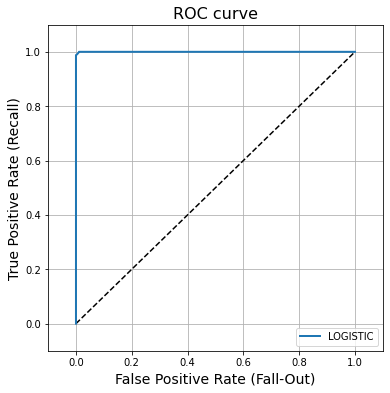


AUC:  0.9999234564362378


[Test] 

Confusion Matrix: 

[[3312   36]
 [   0 3151]] 

Test Accuracy:  0.9945


In [ ]:
CV_check(dt, X_train, y_train)
ROC_check(dt, X_train, y_train)
error_result_check(dt, X_train, y_train)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[Train] 

5-fold CV Clasification report:

   accuracy  precision    recall        f1
0  0.992308   1.000000  0.984152  0.992013
1  0.993077   1.000000  0.985714  0.992806
2  0.993846   1.000000  0.987302  0.993610
3  0.994615   0.989011  1.000000  0.994475
4  0.993841   0.987461  1.000000  0.993691 


Mean Scores:

	accuracy: 0.9935
	precision: 0.9953
	recall: 0.9914
	f1: 0.9933


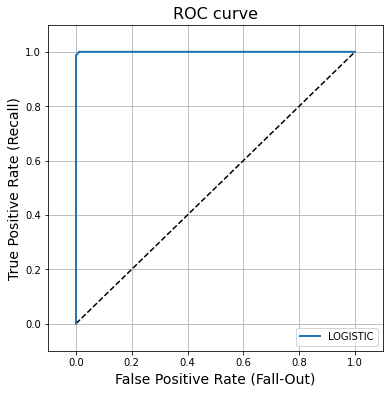


AUC:  0.9999250678796855


[Test] 

Confusion Matrix: 

[[3312   36]
 [   0 3151]] 

Test Accuracy:  0.9945


In [ ]:
CV_check(rf, X_train, y_train)
ROC_check(rf, X_train, y_train)
error_result_check(rf, X_train, y_train)

In [ ]:
cat_col =  [cname for cname in mush.columns if (mush[cname].dtype == "object") & (cname != 'class')]
name_col = []

for cat in cat_col:
    name_col = name_col + list(map(lambda x: cat + '_' + x, mush[cat].unique()))

len(name_col)

27

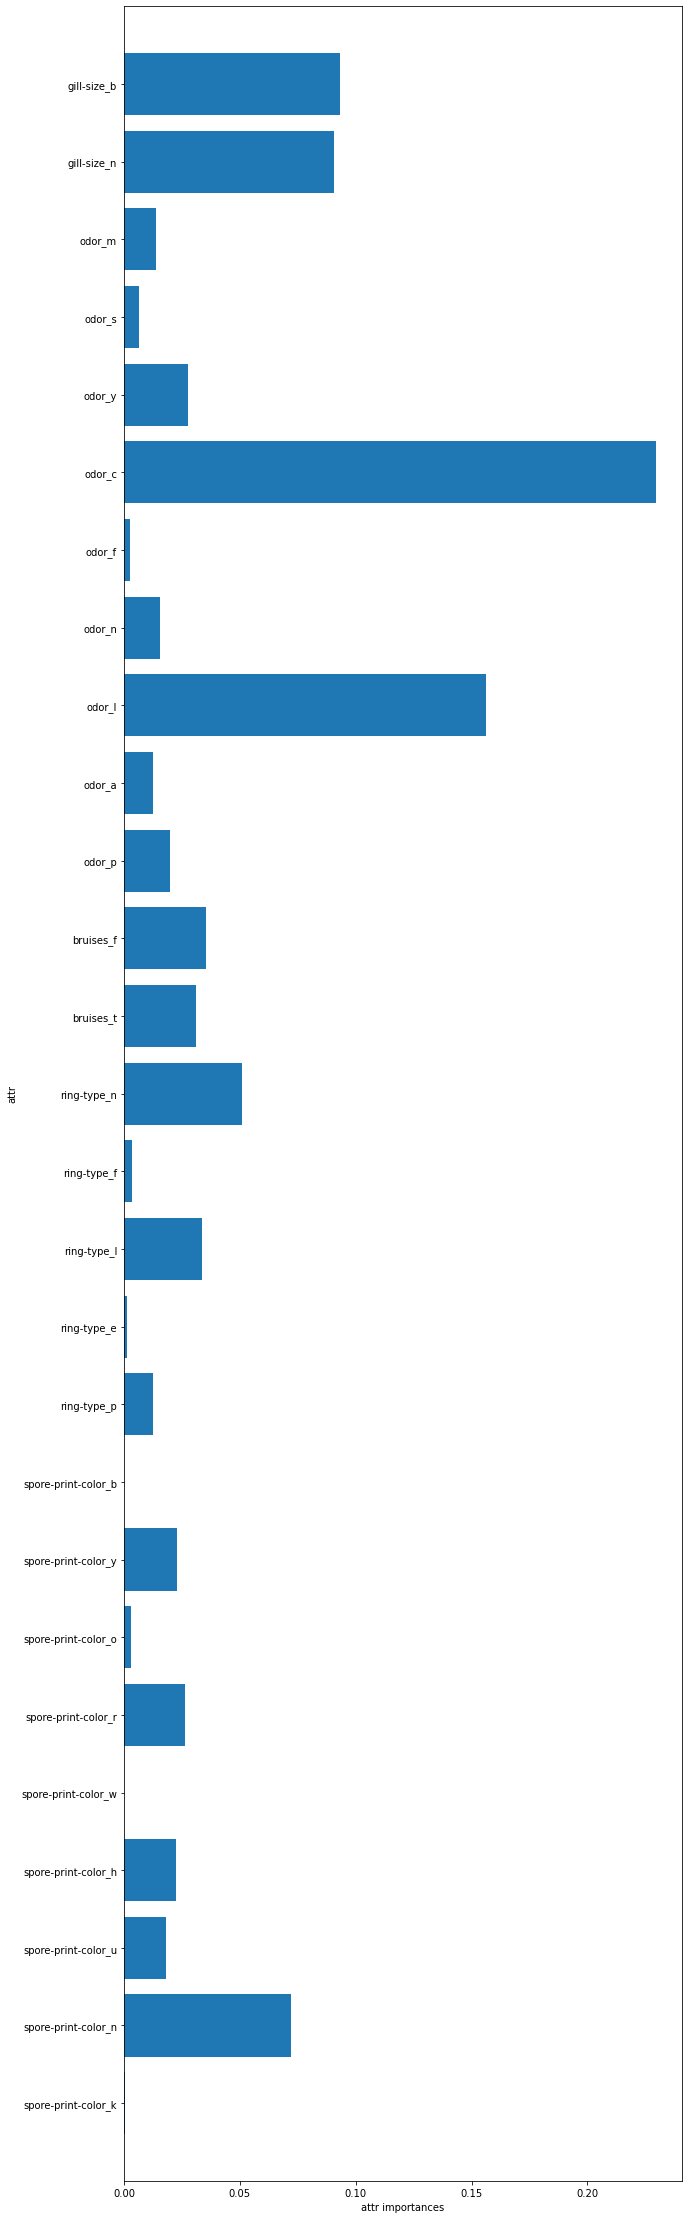

In [ ]:
def plot_feature_importances_cancer(model):
    
    n_features = X.shape[1]
    plt.barh(range(n_features), rf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), name_col)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
    plt.show()
    
plt.figure(figsize=(10, 40))
plot_feature_importances_cancer(rf)

# XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

[Train] 

5-fold CV Clasification report:

   accuracy  precision    recall        f1
0  0.993077   0.985938  1.000000  0.992919
1  0.993077   1.000000  0.985714  0.992806
2  0.994615   0.989011  1.000000  0.994475
3  0.994615   0.989011  1.000000  0.994475
4  0.993841   0.987461  1.000000  0.993691 


Mean Scores:

	accuracy: 0.9938
	precision: 0.9903
	recall: 0.9971
	f1: 0.9937


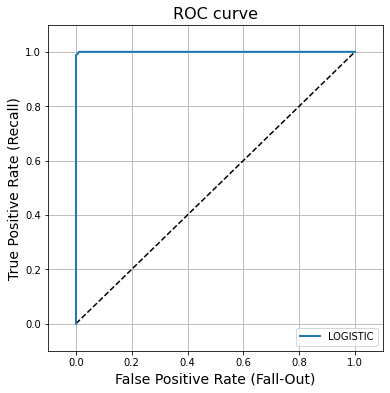


AUC:  0.9999234564362378


[Test] 

Confusion Matrix: 

[[3312   36]
 [   0 3151]] 

Test Accuracy:  0.9945


In [ ]:
CV_check(xgb, X_train, y_train)
ROC_check(xgb, X_train, y_train)
error_result_check(xgb, X_train, y_train)

# LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

[Train] 

5-fold CV Clasification report:

   accuracy  precision    recall        f1
0  0.993077   0.985938  1.000000  0.992919
1  0.993077   1.000000  0.985714  0.992806
2  0.994615   0.989011  1.000000  0.994475
3  0.994615   0.989011  1.000000  0.994475
4  0.993841   0.987461  1.000000  0.993691 


Mean Scores:

	accuracy: 0.9938
	precision: 0.9903
	recall: 0.9971
	f1: 0.9937


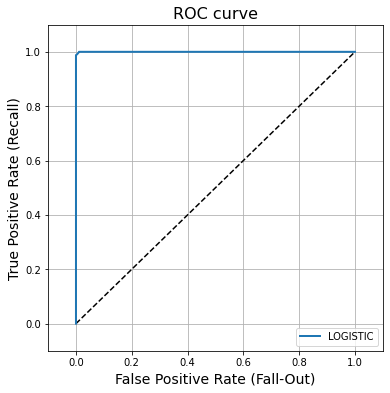


AUC:  0.9999234564362378


[Test] 

Confusion Matrix: 

[[3312   36]
 [   0 3151]] 

Test Accuracy:  0.9945


In [ ]:
CV_check(lgbm, X_train, y_train)
ROC_check(lgbm, X_train, y_train)
error_result_check(lgbm, X_train, y_train)

트리모델 모두 비슷하게 36개 (실제는 식용이나 독버섯으로 분류한) 틀림

# SVC

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
CV_check(svc, X_train, y_train)
# ROC_check(svc, X_train, y_train), predict_proba X, ROC curve X
error_result_check(svc, X_train, y_train)

[Train] 

5-fold CV Clasification report:

   accuracy  precision    recall        f1
0  0.993077   0.985938  1.000000  0.992919
1  0.993077   1.000000  0.985714  0.992806
2  0.994615   0.989011  1.000000  0.994475
3  0.994615   0.989011  1.000000  0.994475
4  0.993841   0.987461  1.000000  0.993691 


Mean Scores:

	accuracy: 0.9938
	precision: 0.9903
	recall: 0.9971
	f1: 0.9937


[Test] 

Confusion Matrix: 

[[3312   36]
 [   0 3151]] 

Test Accuracy:  0.9945


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

[Train] 

5-fold CV Clasification report:

   accuracy  precision    recall        f1
0  0.992308        1.0  0.984152  0.992013
1  0.993077        1.0  0.985714  0.992806
2  0.993846        1.0  0.987302  0.993610
3  0.994615        1.0  0.988889  0.994413
4  0.994611        1.0  0.988889  0.994413 


Mean Scores:

	accuracy: 0.9937
	precision: 1.0
	recall: 0.987
	f1: 0.9935


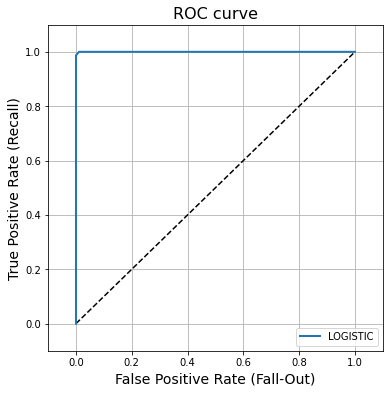


AUC:  0.9999300443962149


[Test] 

Confusion Matrix: 

[[3312   36]
 [   0 3151]] 

Test Accuracy:  0.9945


In [ ]:
CV_check(knn, X_train, y_train)
ROC_check(knn, X_train, y_train)
error_result_check(knn, X_train, y_train)

# 모델 비교

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.model_selection import cross_val_predict

def compare_scores(X, Y):
    models = [logis, dt, rf, xgb, lgbm, svc, knn]
    accuracy_scores = []
    recall_scores = []
    f1_scores = []

    for clf in models:
        y_pred = cross_val_predict(clf, X, Y, cv=5)
        accuracy_scores.append(accuracy_score(Y, y_pred))
        recall_scores.append(recall_score(Y, y_pred))
        f1_scores.append(f1_score(Y, y_pred))

    return accuracy_scores, recall_scores, f1_scores

In [ ]:
tr_acc, tr_rcl, tr_f1 = compare_scores(X_train, y_train)
te_acc, te_rcl, te_f1 = compare_scores(X_test, y_test)

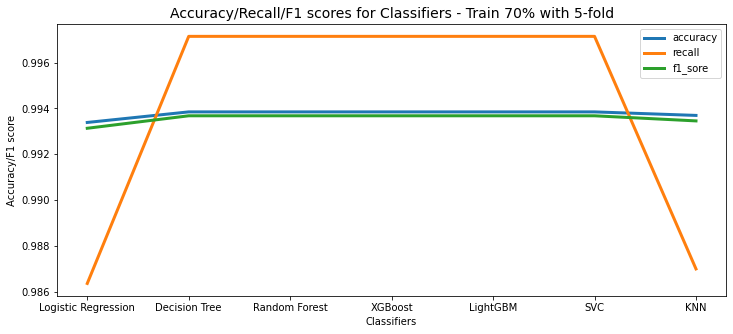

In [ ]:
plt.figure(figsize=(12,5))

mylist = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'SVC', 'KNN']

sns.lineplot(x=mylist, y=tr_acc, linewidth=3, label='accuracy')
sns.lineplot(x=mylist, y=tr_rcl, linewidth=3, label='recall')
sns.lineplot(x=mylist, y=tr_f1, linewidth=3, label='f1_sore')

plt.title('Accuracy/Recall/F1 scores for Classifiers - Train 70% with 5-fold', fontsize=14)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy/F1 score')

plt.legend(loc='upper right')

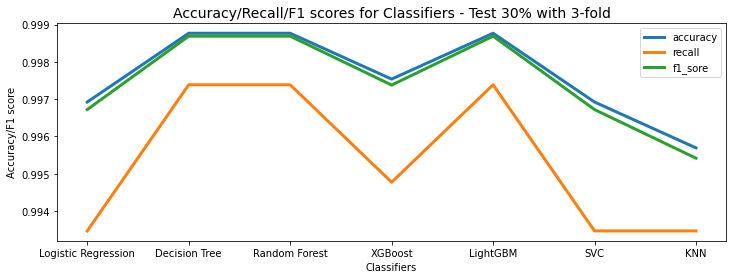

In [ ]:
plt.figure(figsize=(12,4))

mylist = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'SVC', 'KNN']

sns.lineplot(x=mylist, y=te_acc, linewidth=3, label='accuracy')
sns.lineplot(x=mylist, y=te_rcl, linewidth=3, label='recall')
sns.lineplot(x=mylist, y=te_f1, linewidth=3, label='f1_sore')

plt.title('Accuracy/Recall/F1 scores for Classifiers - Test 30% with 3-fold', fontsize=14)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy/F1 score')

plt.legend(loc='upper right')